In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# RQs 1 
Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

# Authors dataframe

Description of the step i have followed to analyze the dataset: 
1. I loaded the dataset and see that has 11 column and 352504 sample.
2. I check the basic info about it, so i checked if there are some null value and also the type of each variable to understand how to work with them
3. With the function describe() i have analyzed the most important statistical function.
4. For the last step i have cleaned the dataset from all wrong data.

In [50]:
df=pd.read_json('lighter_authors.json',lines=True)
df.head()

ratings_count  average_rating  text_reviews_count  \
0        2862064            4.19               62681   
1        1417316            4.02               84176   
2          56159            4.53                 352   
3           3302            3.79                 480   
4           7979            3.60                 772   

                                            work_ids  \
0  [3078186, 135328, 1877624, 74123, 3078120, 104...   
1  [613469, 2305997, 940892, 2611786, 7800569, 31...   
2  [17150, 808427, 20487307, 90550, 25460625, 171...   
3  [4417, 14300808, 14780, 3796968, 44703121, 103...   
4  [13330815, 19109351, 42306244, 72694240, 26291...   

                                            book_ids  works_count  id  \
0  [386162, 13, 8695, 8694, 6091075, 365, 569429,...          106   4   
1  [9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...           75   7   
2  [349254, 15222, 14833682, 15221, 18126815, 152...           14  10   
3  [40, 9416484, 12482, 3753106, 26889789, 104764...           45  12   
4  [8466327, 15739968, 22756778, 51026133, 260451...           61  14   

                      name  gender  \
0            Douglas Adams    male   
1              Bill Bryson    male   
2              Jude Fisher  female   
3  James Hamilton-Paterson    male   
4              Mark Watson    male   

                                           image_url  \
0  https://images.gr-assets.com/authors/159137433...   
1  https://images.gr-assets.com/authors/157859752...   
2  https://images.gr-assets.com/authors/141145711...   
3  https://images.gr-assets.com/authors/127051738...   
4  https://images.gr-assets.com/authors/133175379...   

                                               about  fans_count  
0  Douglas Noël Adams was an English author, comi...       19826  
1  William McGuire "Bill" Bryson, OBE, FRS was bo...       16144  
2  Jude Fisher is the pseudonym for <a href="http...          60  
3  James Hamilton-Paterson's work has been transl...          72  
4  Mark Andrew Watson (born 13 February 1980) is ...         179

In [ ]:
df.tail()

In [4]:
count_lines = sum(1 for line in open('lighter_authors.json'))
count_lines
#the total of sample are 352504

352504

check if there is any duplicate row

In [6]:
duplicates = df.duplicated()
print(duplicates,'Duplicate rows')

No duplicate rows found.


In [7]:
df.info() 
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


I checked if there are some null value, but from this function figure out that there are no value null. 
I want to remark that as it showed in the tail value there are some missed value (like the gender for James Ross) that aren't signed like null.

In [9]:
df.describe()

ratings_count  average_rating  text_reviews_count   works_count  \
count   3.517670e+05   351767.000000       351767.000000  3.517670e+05   
mean    4.770586e+03        3.651194          330.993243  2.593714e+01   
std     9.769395e+04        1.211482         3857.539191  3.066083e+03   
min    -4.100000e+01      -31.000000            0.000000  0.000000e+00   
25%     6.000000e+00        3.600000            1.000000  2.000000e+00   
50%     3.900000e+01        3.950000            8.000000  6.000000e+00   
75%     3.100000e+02        4.250000           53.000000  1.500000e+01   
max     2.700375e+07        5.000000       608956.000000  1.775176e+06   

                 id     fans_count  
count  3.517670e+05  351767.000000  
mean   7.751861e+06     111.615731  
std    6.578409e+06    2661.018139  
min    4.000000e+00     -33.000000  
25%    1.535315e+06       1.000000  
50%    6.470396e+06       4.000000  
75%    1.434041e+07      20.000000  
max    2.124802e+07  766035.000000

The minimum of ratings_count, average_rating and fans_count is negative, that have no sense, so i analyze them better and then i decide if delete them or sobstitute.

<AxesSubplot:ylabel='Frequency'>

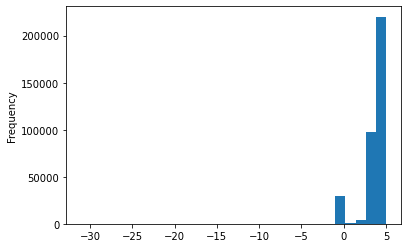

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].df.average_rating.plot.hist(bins=30)
axes[1].df.rating_count.plot.hist(bins=30)

ratings_count         69
average_rating        69
text_reviews_count    69
work_ids              69
book_ids              69
works_count           69
id                    69
name                  69
gender                69
image_url             69
about                 69
fans_count            69
dtype: int64

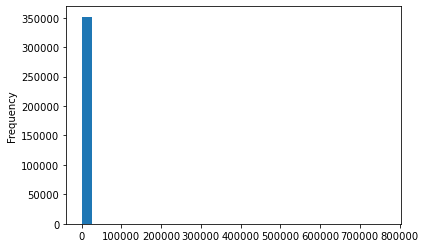

In [12]:
df.fans_count.plot.hist(bins=30)
df[df['fans_count']<0].count() 
df[df['fans_count']>0].count() #269415 over 352504
df[df['fans_count']>50000].count() #only 69

From this plot seems that the most of the author have a number of fans that is included in a rege of 0 to 50000, so i wont to check how many sample are over 50000 and i found only 69 sample. I think that is good because only the most famouse author have this amount of fans.
A strange thing is the value of fans_count less than 0 that are 23 so i want to sobstitute them with a null value, because they could potentially cause issue in the future estimations. This considerations are equal for all the value of average_rating and ratings_count less than 0.

In [13]:
#the data with rating <0 are not relevant because probably they are wrong
wrong_data = (df['average_rating'] < 0)
wrong_data1 = (df['ratings_count'] < 0)
wrong_data2 = (df['fans_count'] < 0)

df.loc[wrong_data, 'average_rating'] = np.nan
df.loc[wrong_data1, 'ratings_count'] = np.nan
df.loc[wrong_data2, 'fans_count'] = np.nan

In [ ]:
print(len(df.works_count))
print(len(df.work_ids))

works count don't have the same length of works_ids so i decide to sobstitute the value of works_count with the lengths of the work_ids.

In [14]:
df['works_count']=df['work_ids'].apply(len)

4607
1212


Cleaning dataset:

In [48]:
import pandas as pd
import numpy as np
df=pd.read_json('lighter_authors.json',lines=True)
df=df[df.name != 'NOT A BOOK']
df['works_count']=df['work_ids'].apply(len)

wrong_data = (df['average_rating'] < 0)
wrong_data1 = (df['ratings_count'] < 0)
wrong_data2 = (df['fans_count'] < 0)
df.loc[wrong_data, 'average_rating'] = np.nan
df.loc[wrong_data1, 'ratings_count'] = np.nan
df.loc[wrong_data2, 'fans_count'] = np.nan

# Books dataframe

In [ ]:
chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)

for chunk in chunks:
   
    print(chunk.head(2))

In [15]:
count_lines = sum(1 for line in open('lighter_books.json'))
count_lines

7029332

This dataframe have 7029332 rows and 25 column

I decide to create more chunk to work on this big dataframe.

In [ ]:

chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)

for chunk in chunks:
   
    print(chunk.info())


We have to remove the column authors because it contain some value that we already have as author id and name and also frequently this values is null. Infact in a group of 10000 values, author isn't null only 3742 times, so only the 37,42%. so i think it can be removed. 

In [20]:
import pandas as pd

chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)

unique_author = set() 

for chunk in chunks:
    for _, book in chunk.iterrows():
        author = book.get("author_name")
        if author:
            unique_author.add(author)


for i in unique_author:
    print(i)


سید مهدی موسوی
Dan Thurmon
Sibusiso Nyembezi
Lori Perry
Melinda  Hammond
Evan Innes
Paulo Castilho
Ibrahim Dt. Sanggoeno Diradjo
Katja Hoehn
Móra Ferenc
John Kosek
Cynthia von Buhler
Patricia Bossano
Judy Brutz
Michel Thomas
Anthony J. Paone
Kristal McKerrington
Helen Hancocks
Anne Argula
Zukiswa Wanner
R.M. Doyon
Mary Gaebler
Philippe Henry
Sarah Parker Morris
Mary McDermott Shideler
Kate Papas
د.وليد سيف
Arthur C. Danto
Vasile Lovinescu
Willem Jardin
Jeanne Martinson
Beth Booram
Darrell B.  Nelson
Şavkar Altınel
P.S. Baber
Jennifer Donnelly
Benjamin Matthew Wallace
Jill     Smith
Curion
M.D.  Williams
Lee Ann Rubsam
Jaroslav Pelikan
Marina Bridges
Barbara McLaughlin
Robert Sirico
Liza Hanks
Veronica Locke
Valerio Varesi
Suzanne Mettler
Ngwatilo Mawiyoo
Borislava Borissova
Gerald  Clarke
Kenneth E. Bryant
Hans Danuser
محمدرضا اصلانی
Kōdansha
Любомир П. Николов
Piers Morgan
Richard           Parker
ladyoneill
Andi Eaton
Breanna Cone
Seb Doubinsky
Ferguson Shaw
Don DeBon
Christa Madrid

Now i have show all the name of the author to understand if there are some strange value

In [21]:
print(len(unique_author))


259792


In total we have 259792 different author but some of this are not autor name as Rod o Wikipedia, Fuente Wikipedia, Source Wikipedia, that i think are related to small book or report that haven't one properly author or the author is unknown. There are also value like Unknown Author and Unknown, but each value has different id and property.
I also found some author name equal at NOT A BOOK so i decide to drop the rows related to this value because i think they have no sense.
I will do all this change at the end of this analysis with the other i find to do later.

I want to see if there are also in this dataframe value of rating that have no sense.

In [ ]:

chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)

for i, chunk in enumerate(chunks):


    filtered_chunk = chunk[chunk.average_rating < 0]

  
    print(f"Result for the chunk {i}:")
    print(filtered_chunk)




In this case there isn't value of rating less than 0. \
Now i check if there are title duplicated

In [2]:
import pandas as pd
#check the duplicated title
chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)
for i, chunk in enumerate(chunks):
    
    chunk[chunk.title.duplicated()]

There are many book duplicated, but i think that each row is different because of the different publication of each book 

We have to notice that there are some books that have no language, signed as '' , '--', and 'select...' that have no sense. So i decide to substitue them with ''

Now after this analysis i create a subset with the column we need in the firsts RQs, because working on the chunck imply iterate the dataset each time i want to do a query.
So i remove the column authors as i wrote before. Also, i decide to removed other column that are too big, like description, or useless, like image_url.
I have also removed all the line that have the author_name equal 'not a book' that have no sense in our analysis on the books.


In [17]:
import pandas as pd

col_to_remove = ['authors', 'isbn', 'isbn13', 'image_url', 'description', 'shelves','asin','series_position','rating_dist']

df_new = []

chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)

for i, chunk in enumerate(chunks):
    
    chunk = chunk.drop(columns=col_to_remove)
    chunk['language'] = chunk['language'].replace(['--','Select...'], '')
    chunk= chunk[chunk.author_name != 'NOT A BOOK']
    df_new.append(chunk)


df_new = pd.concat(df_new, ignore_index=True)

#take 28min to run

KeyboardInterrupt: 

# RQs2 
Let’s finally dig into this vast dataset, retrieving some vital information:
1. Plot the number of books for each author in descending order.

In [23]:
df_new.head(2)

id                                              title   author_name  \
0   2  Harry Potter and the Order of the Phoenix (Har...  J.K. Rowling   
1   3  Harry Potter and the Sorcerer's Stone (Harry P...  J.K. Rowling   

   author_id  work_id language  average_rating  \
0    1077326  2809203      eng            4.50   
1    1077326  4640799      eng            4.48   

                                         rating_dist  ratings_count  \
0  5:1674064|4:664833|3:231195|2:41699|1:16215|to...        2628006   
1  5:4801606|4:1681521|3:623286|2:145898|1:125040...        7377351   

   text_reviews_count publication_date original_publication_date     format  \
0               44716          2004-09                2003-06-21  Paperback   
1              116930       2003-11-01                1997-06-26  Hardcover   

  edition_information        publisher num_pages series_id   series_name  \
0          US Edition  Scholastic Inc.       870     45175  Harry Potter   
1     Library Edition   Scholastic Inc       309     45175  Harry Potter   

  series_position  
0               5  
1               1

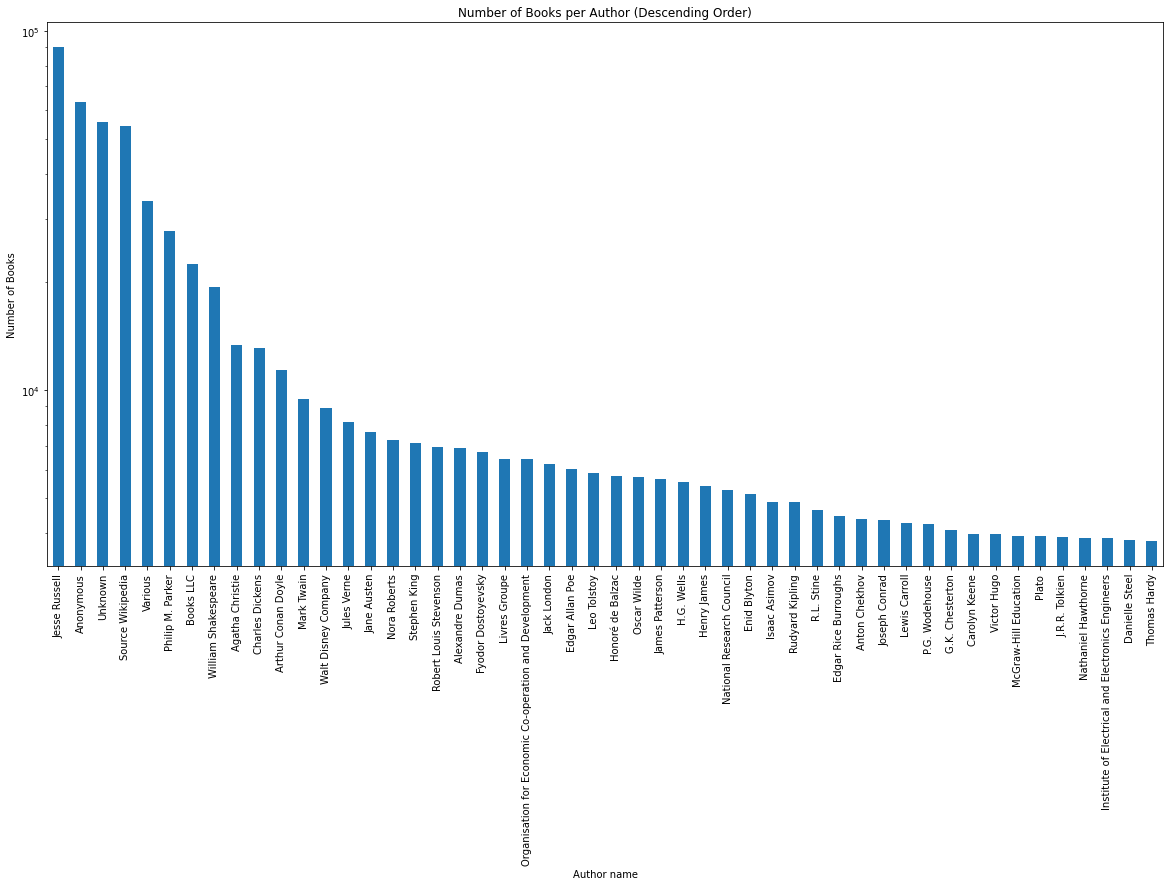

In [8]:
import matplotlib.pyplot as plt
author_counts = df_new.groupby('author_name')['work_id'].count()

# Sort the counts in descending order
author_count = author_counts.sort_values(ascending=False).head(50)


# Create a bar plot
plt.figure(figsize=(20, 10))
author_count.plot(kind='bar')
plt.title('Number of Books per Author (Descending Order)')
plt.xlabel('Author name')
plt.ylabel('Number of Books')
plt.yscale("log")
plt.show()


Jessie russell is the author that has written the biggest ammount of books, but the following four values are Anonymous,Unknown, Source Wikipedia and Various that has no sense. i think they are a sum of books from different author, but i checked them and each one has a different author id so i don't delete them, because they probably contain useful data for the nexts analysis.
From this plot also is clear that the authors aren't only one person, but somethimes they are an organization or a company as 'national research concil' or 'livre group' and others.

2. Which book has the highest number of reviews?

The book with the highest number of reviews is 'The Hunger Games (Hunger Games, #1)',published on the 14/09/2008, that has 174524 reviews with an average_rating 4.32. We have, also, to notice that many value related to this book are missed.

In [26]:
max_reviews_count = df_new['text_reviews_count'].max()
book_with_max_reviews = df_new[df_new['text_reviews_count'] == max_reviews_count]


#174524 reviews

In [28]:
print(book_with_max_reviews)


               id                                title      author_name  \
5167042  19304768  The Hunger Games (Hunger Games, #1)  Suzanne Collins   

         author_id  work_id language  average_rating  \
5167042     153394  2792775    en-US            4.32   

                                               rating_dist  ratings_count  \
5167042  5:3572190|4:1993815|3:772952|2:178537|1:97671|...        6615165   

         text_reviews_count publication_date original_publication_date format  \
5167042              174524                                 2008-09-14          

          edition_information publisher num_pages series_id       series_name  \
5167042  Movie Tie-in Edition                         73758  The Hunger Games   

        series_position  
5167042               1  


3. Which are the top ten and ten worst books concerning the average score?

In [10]:
# top 10
best_book = df_new.sort_values(by='average_rating',ascending=False).head(10)
print(best_book[['author_name','title','average_rating']])


# worst 10
worst_book = df_new.sort_values(by='average_rating',ascending=False).tail(10)
print(worst_book[['author_name','title','average_rating']])

                       author_name  \
4926230                Thomas Holt   
1669276                Regi Claire   
6673173              James   Pratt   
4979896              Ray  Hamilton   
310837                 Maury Klein   
4979851               Laura Thomas   
4979841  Stephanie Pitcher Fishman   
4979836              R.A.G. Carson   
6673187             Joaquín Sabina   
4979804           Michio Morishima   

                                                     title  average_rating  
4926230  Hackers and Hacking: A Reference Handbook: A R...             5.0  
1669276                                        Fighting It             5.0  
6673173               British Chess Magazine: January 2015             5.0  
4979896                                Military Quotations             5.0  
310837   Complete Service Manual for American Flyer Trains             5.0  
4979851                              When the Bough Breaks             5.0  
4979841  Researching the Plain Religions (

4. Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

In the books dataset there are 338 different languages and the most used is the english that is about to 14e^6 books, instead the other are all under 0.2e^6 books written. Many books hasn't the language values, more than the ammount of books written in english. So i didn't plot the missing values to analyze better the other values.


In [29]:

languages = df_new['language'].unique()

# Stampa i nomi delle lingue uniche
for language in languages:
    print(language)

#there are different languages 

akk
sam
nya
arp
jpn
tyv
wol
ibo
mga
nwc
del
pro
kaz
myn
kok
bem
wel
frr
chb
ben
pus
fil
gre
peo
tgk
hmn
lez
tur
nor
tha
ast
hup
ewe
ine
chu
inc
snd
cha
ath
cat
ita
und
en-IN
pal
ber
tel
zul
mkd
chg
xho
pap
est
nso
srp
nob
mar
tai
zho
grn
frm
nep
dut
rup
pra
jrb
glg
kur
en-US
gmh
cos
en
fre
dsb
mus
ban
iba
vai
div
fur
cad
anp
gem
vie
smn
dra
guj
kik
znd
twi
mlt
bnt
oci
srd
dan
kac
sms
cpf
uig
bul
scr
zun
pes
cre
jbo
aar
nno
din
dzo
bat
hun
nld
uzb
fij
hau
efi
dak
sna
sgn
mul
myv
ira
nl
awa
afa
bug
jav
ave
smo
paa
kbd
goh
roa
bre
sla
lit
ota
kal
krl
iku
bos
Select...
sin
ceb
gsw
art
ara
ilo
got
san
sga
fro
raj
alt
swa
fry
cus
ace
tgl
ale
epo
chn
kha
map
sag
ada
phi
tut
dar
mwl
bam
wen
nym
afh
gle
sit
aka
dua
sun
lun
que
swe
nav
wak
ger
mun
ain
ful
kon
aym
nap
mri
bua
sem
hin
roh
rom
sel
slv
asm
lao
sah
srn
ewo
men
run
gla
glv
chi
ang
ipk
udm
iro
cop
abk
aus
dum
kor
sqi
fiu
pol
kir
lad
mis
ind
pan
arg
fat
bad
en-CA
yid
tsn
was
ypk
ach
sal
che
nub
nds
elx
enm
hit
es-MX
mya
pt-BR
rgn
frs
ap

In [ ]:
sns.countplot(x='language',hue='title',data=df_new)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Type of books in different languages")

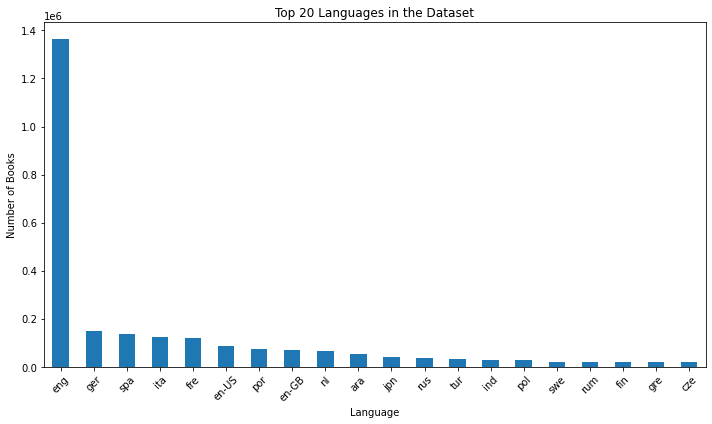

In [11]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a 'language' column in your DataFrame
language_counts = df_new['language'].value_counts()

# Rimuovi il valore 'Unknown' (o qualsiasi altro valore indesiderato)
unwanted_value = ('')
if unwanted_value in language_counts:
    language_counts.drop(unwanted_value, inplace=True)

# Choose the top N most common languages
top_N = 20
top_languages = language_counts.head(top_N)

# Create a bar chart for language distribution
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar')
plt.xlabel("Language")
plt.ylabel("Number of Books")
plt.title(f"Top {top_N} Languages in the Dataset")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




Printing the last ten languages i see that all of this have only one book write. So i decide to print all the languages with only one book and i see that they are 90 languages over 338 total. So the plot of the last value in this case is not useful.


In [13]:
import pandas as pd

# Assuming you have a 'language' column in your DataFrame
language_counts = df_new['language'].value_counts()

# Trova le lingue con un solo libro
languages_with_one_book = language_counts[language_counts == 1]

# Lista delle lingue con un solo libro
unique_languages = languages_with_one_book.index.tolist()

# Stampa le lingue con un solo libro
print("lenguage with only one book:")
print(len(languages_with_one_book))
#for language in unique_languages:
#    print(language)


lenguage with only one book:
90


5. How many books have more than 250 pages?

Number of books with more than 250 pages are 1809702

In [5]:
import pandas as pd

# Assuming you have a 'num_pages' column in your DataFrame
df_new['num_pages'] = pd.to_numeric(df_new['num_pages'], errors='coerce').fillna(0).astype(int)

# Count the number of books with more than 250 pages
books_more_than_250_pages = len(df_new[df_new['num_pages'] > 250])

# Print the result
print(f"Number of books with more than 250 pages: {books_more_than_250_pages}")


Number of books with more than 250 pages: 1809702


6. Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books)

In [41]:
df.head()

ratings_count  average_rating  text_reviews_count  \
0        2862064            4.19               62681   
1        1417316            4.02               84176   
2          56159            4.53                 352   
3           3302            3.79                 480   
4           7979            3.60                 772   

                                            work_ids  \
0  [3078186, 135328, 1877624, 74123, 3078120, 104...   
1  [613469, 2305997, 940892, 2611786, 7800569, 31...   
2  [17150, 808427, 20487307, 90550, 25460625, 171...   
3  [4417, 14300808, 14780, 3796968, 44703121, 103...   
4  [13330815, 19109351, 42306244, 72694240, 26291...   

                                            book_ids  works_count  id  \
0  [386162, 13, 8695, 8694, 6091075, 365, 569429,...          106   4   
1  [9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...           75   7   
2  [349254, 15222, 14833682, 15221, 18126815, 152...           14  10   
3  [40, 9416484, 12482, 3753106, 26889789, 104764...           45  12   
4  [8466327, 15739968, 22756778, 51026133, 260451...           61  14   

                      name  gender  \
0            Douglas Adams    male   
1              Bill Bryson    male   
2              Jude Fisher  female   
3  James Hamilton-Paterson    male   
4              Mark Watson    male   

                                           image_url  \
0  https://images.gr-assets.com/authors/159137433...   
1  https://images.gr-assets.com/authors/157859752...   
2  https://images.gr-assets.com/authors/141145711...   
3  https://images.gr-assets.com/authors/127051738...   
4  https://images.gr-assets.com/authors/133175379...   

                                               about  fans_count  
0  Douglas Noël Adams was an English author, comi...       19826  
1  William McGuire "Bill" Bryson, OBE, FRS was bo...       16144  
2  Jude Fisher is the pseudonym for <a href="http...          60  
3  James Hamilton-Paterson's work has been transl...          72  
4  Mark Andrew Watson (born 13 February 1980) is ...         179

For this question i used the df of authors

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

top_50_authors = df.groupby("name").agg({"works_count": "sum", "fans_count": "sum"}).nlargest(50, "works_count")

plt.figure(figsize=(20, 10))
plt.bar(top_50_authors.index, top_50_authors["fans_count"], color='pink')
plt.xlabel('Author Name')
plt.ylabel('Fans Count')
plt.title('Distribution of Fans Count for the 50 Most Prolific Authors')
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()





NameError: name 'df' is not defined

Stephen King is the writer that have the big number of fans from the 50 prolific author.
In general is important to notice that all the first 50 authors has a biggest ammount of fans, in fact i had to use a logaritmic scale, this is probably because the authors that has written the biggest amount of books are the most popular.

**It is important to notice also the values 'Unknown', 'various' and Anonymous that has only one id, so they are related eachone to one author that has unknown name. But i think is strange that an unknown author as an ammount of fans like this so probably in the variable unknown there are book of different author**

ratings_count  average_rating  text_reviews_count  \
187134         431204            3.58               18883   

                                                 work_ids  \
187134  [189503, 2954048, 15068023, 477, 370900, 11453...   

                                                 book_ids  works_count  \
187134  [52357, 3049, 23613, 73419, 381112, 18261, 100...       163434   

             id     name gender  \
187134  4699102  Unknown          

                                                image_url  \
187134  https://s.gr-assets.com/assets/nophoto/user/u_...   

                                                    about  fans_count  
187134  Books can be attributed to "Unknown" when the ...        1067

# RQ3
Let’s have a historical look at the dataset!

Write a function that takes as input a year and returns as output the following information:

- The number of books published that year.

- The total number of pages written that year.

- The most prolific month of that year.

- The longest book written that year.



In [ ]:
def books_fun(df,year):
    book_y=df[df.apply(lambda row: year in row.values, axis=1)]
    #The number of books published that year
    number_of_book= len(book_y)
    #The total number of pages written that year
    tot_page=book_y['num_pages'].sum()
    #The most prolific month of that year
    prolific_month=book_y['month'].sum().idmax()
    #The longest book written that year
    long_book=book_y['num_pages'].sum().max()
    return number_of_book, tot_page, prolific_month, long_book

Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

In [19]:
df_new.head(2)

id                                              title   author_name  \
0   2  Harry Potter and the Order of the Phoenix (Har...  J.K. Rowling   
1   3  Harry Potter and the Sorcerer's Stone (Harry P...  J.K. Rowling   

   author_id  work_id language  average_rating  \
0    1077326  2809203      eng            4.50   
1    1077326  4640799      eng            4.48   

                                         rating_dist  ratings_count  \
0  5:1674064|4:664833|3:231195|2:41699|1:16215|to...        2628006   
1  5:4801606|4:1681521|3:623286|2:145898|1:125040...        7377351   

   text_reviews_count publication_date  \
0               44716          2004-09   
1              116930       2003-11-01   

                           original_publication_date     format  \
0  0          2003-06-21\n1          1997-06-26\n...  Paperback   
1  0          2003-06-21\n1          1997-06-26\n...  Hardcover   

  edition_information        publisher num_pages series_id   series_name  \
0          US Edition  Scholastic Inc.       870     45175  Harry Potter   
1     Library Edition   Scholastic Inc       309     45175  Harry Potter   

  series_position  
0               5  
1               1

In [8]:
df_new[df_new['original_publication_date'] == '']
# 409460 missing values

id                                              title  \
35             39                              The Lord of the Rings   
69             84                                              Heidi   
164           217  Charles Willeford Omnibus: Pick Up/Burnt Orang...   
215           285                                       Love Letters   
234           309                                 Daniel Deronda, V1   
...           ...                                                ...   
6988645  25520525                     Egne Veier: Essays Og Foredrag   
6988751  25520760                  A Murder, Inc. (Murder, Inc., #2)   
6988761  25520780                            Batman (1940-2011) #702   
6988786  25520858                       الحجاب بين التشريع والإجتماع   
6988840  25521016                Lives of Mahomet and his successors   

                author_name  author_id   work_id language  average_rating  \
35             Brian Sibley       4941  62400415      eng            4.76   
69        Loretta Krupinski         41  56023144                     4.50   
164       Charles Willeford    3114972      4561                     4.37   
215           Kahlil Gibran    6466154  78543265      eng            3.73   
234            George Eliot        173  53533108                     4.31   
...                     ...        ...       ...      ...             ...   
6988645  Trond Berg Eriksen     779959   1689566                     3.00   
6988751       Stella Purple    6859284  80084254                     4.64   
6988761      Grant Morrison      12732  45305407                     3.58   
6988786            عطية صقر    3353799  45305492                     3.00   
6988840   Washington Irving      28525  68547028                     3.78   

                                     rating_dist  ratings_count  \
35       5:4964|4:822|3:178|2:39|1:34|total:6037           6037   
69                  5:9|4:9|3:0|2:0|1:0|total:18             18   
164               5:26|4:11|3:4|2:0|1:2|total:43             43   
215        5:138|4:121|3:114|2:41|1:19|total:433            433   
234               5:19|4:14|3:5|2:1|1:0|total:39             39   
...                                          ...            ...   
6988645              5:0|4:0|3:1|2:0|1:0|total:1              1   
6988751             5:8|4:2|3:1|2:0|1:0|total:11             11   
6988761             5:4|4:1|3:5|2:2|1:0|total:12             12   
6988786              5:0|4:1|3:0|2:1|1:0|total:2              2   
6988840             5:5|4:8|3:2|2:2|1:1|total:18             18   

         text_reviews_count publication_date original_publication_date  \
35                       57                                              
69                        3       1996-08-01                             
164                       2                                              
215                      31       1999-07-01                             
234                       8       2003-07-21                             
...                     ...              ...                       ...   
6988645                   0                                              
6988751                   0          2015-05                             
6988761                   0                                              
6988786                   0                                              
6988840                   1                                              

                  format                        edition_information  \
35                        abridged, BBC Radio Dramatisation, 13 CDs   
69             Hardcover                                              
164      Unknown Binding                                              
215            Hardcover                                              
234            Paperback                                              
...                  ...                                        ...   
6988645                           

In [6]:
df_new[df_new['publication_date'] == '']
# 2118769 values missing

id                                              title  \
12             15  The Hitchhiker's Guide to Lean: Lessons from t...   
28             32                              The Lord of the Rings   
35             39                              The Lord of the Rings   
39             49                                           Bucaneer   
81             97                                      The Birthdays   
...           ...                                                ...   
6988828  25520984  Eye Openers: Good Things, Immensely Funny Sayi...   
6988829  25520988  A Treatise Against Two Letters of the Pelagian...   
6988833  25521004                                        Love Vapors   
6988834  25521006            Il mondo di ieri: Ricordi di un europeo   
6988840  25521016                Lives of Mahomet and his successors   

                author_name  author_id   work_id language  average_rating  \
12        Jamie Flinchbaugh     951394      4409                     3.73   
28           J.R.R. Tolkien     656983   3462456      eng            4.50   
35             Brian Sibley       4941  62400415      eng            4.76   
39            Luther Butler         17      4420                     3.83   
81             Heidi Pitlor         52    430590      eng            2.85   
...                     ...        ...       ...      ...             ...   
6988828          Mark Twain       1244  15547994      eng            0.00   
6988829  Augustine of Hippo    6819578  40629072                     4.22   
6988833       Michael Allen        893  45305703                     3.00   
6988834        Stefan Zweig      25573    615762      ita            4.49   
6988840   Washington Irving      28525  68547028                     3.78   

                                               rating_dist  ratings_count  \
12                         5:20|4:30|3:20|2:6|1:3|total:79             79   
28       5:382112|4:135628|3:46986|2:12435|1:6838|total...         583999   
35                 5:4964|4:822|3:178|2:39|1:34|total:6037           6037   
39                             5:3|4:1|3:1|2:0|1:1|total:6              6   
81                    5:39|4:60|3:157|2:123|1:38|total:417            417   
...                                                    ...            ...   
6988828                        5:0|4:0|3:0|2:0|1:0|total:0              0   
6988829                        5:5|4:1|3:3|2:0|1:0|total:9              9   
6988833                        5:0|4:0|3:1|2:0|1:0|total:1              1   
6988834         5:7624|4:3531|3:920|2:209|1:92|total:12376          12376   
6988840                       5:5|4:8|3:2|2:2|1:1|total:18             18   

         text_reviews_count publication_date original_publication_date  \
12                        4                                 2005-12-01   
28                    11882                                 1955-10-20   
35                       57                                              
39                        1                                 2000-10-18   
81                       63                                 2007-01-01   
...                     ...              ...                       ...   
6988828                   0                                       1871   
6988829                   1                                        395   
6988833                   0                                 2015-01-22   
6988834                1218                                       1942   
6988840                   1                                              

            format                        edition_information  \
12                                                              
28       Paperback                     Box Set / Movie Tie in   
35                  abridged, BBC Radio Dramatisation, 13 CDs   
39                                                              
81                                                              
...            ...   

I decide to use original_publication_date in order to extract month and year, because it has less missing values.
But also this column has many problem, because some values are missing('') and other contains only the year and not month and day. 

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6988842 entries, 0 to 6988841
Data columns (total 19 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   title                      object 
 2   author_name                object 
 3   author_id                  int64  
 4   work_id                    int64  
 5   language                   object 
 6   average_rating             float64
 7   rating_dist                object 
 8   ratings_count              int64  
 9   text_reviews_count         int64  
 10  publication_date           object 
 11  original_publication_date  object 
 12  format                     object 
 13  edition_information        object 
 14  publisher                  object 
 15  num_pages                  object 
 16  series_id                  object 
 17  series_name                object 
 18  series_position            object 
dtypes: float64(1), int64(5), object(13)
memory

original_publication_date is an object

In [4]:
df_new['original_publication_date'] = df_new['original_publication_date'].astype(str)

In [20]:
#df_a=df_new[df_new['author_name','title','original_publication_date','num_pages','book_id']]
df_new= df_new[df_new.original_publication_date != '']

In [15]:
# Nuove colonne per year, month e day
df_new[['year', 'month', 'day']] = df_new['original_publication_date'].str.split('-', expand=True)

# Funzione per gestire i casi speciali
def handle_special_cases(row):
    if row['year'].startswith('-'):
        row['year'] = None
    if not row['month']:
        row['month'] = None
    if not row['day']:
        row['day'] = None
    return row

# Applica la funzione a ciascuna riga
df_new = df_new.apply(handle_special_cases, axis=1)

# Rimuovi le righe in cui 'year' è None
df_new = df_new.dropna(subset=['year'])
df_b = pd.DataFrame(index=df_new.index)

df_b['Number_of_Books'] = df_new.apply(lambda row: books_fun(df_new, row['year'])[0], axis=1)
df_b['Total_Pages'] = df_new.apply(lambda row: books_fun(df_new, row['year'])[1], axis=1)
df_b['Prolific_Month'] = df_new.apply(lambda row: books_fun(df_new, row['year'])[2], axis=1)
df_b['Longest_Book'] = df_new.apply(lambda row: books_fun(df_new, row['year'])[3], axis=1)

# Aggiungi le colonne specifiche da df_new a df_b
df_b[['language','author_name','title','original_publication_date','num_pages','work_id','author_id','average_rating']] = df_new[['language','author_name','title','original_publication_date','num_pages','work_id','author_id','average_rating']]

# Visualizza il nuovo DataFrame df_b
print(df_b)


In [ ]:
# Assuming you already have a DataFrame named df

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Year', 'Number_of_Books', 'Total_Pages', 'Prolific_Month', 'Longest_Book'])

# Iterate over the range of years (from the first ten years to the last ten years)
for year in range(df_new['year'].min(), df_new['year'].min() + 10):
    number_of_book, tot_page, prolific_month, long_book = books_fun(df, year)
    result_df = result_df.append({'Year': year,
                                  'Number_of_Books': number_of_book,
                                  'Total_Pages': tot_page,
                                  'Prolific_Month': prolific_month,
                                  'Longest_Book': long_book},
                                 ignore_index=True)

# Show the head and tail of the resulting DataFrame
print(result_df.head(10))  # First ten years registered
print(result_df.tail(10))  # Last ten years registered


In [16]:
df_b.head(2)

original_publication_date    year  month   day
0                2022-01-15  2022.0      1  15.0
1                   2023-02  2023.0      2   NaN

In [ ]:
df_b.head(10)
df_b.tail(10)

Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.

In [ ]:


def get_yearly_information(df, year):
    # Filter books published in the specified year
    books_in_year = df[df['publication_year'] == year]
    
    # Calculate the number of books published that year
    num_books = len(books_in_year)
    
    # Calculate the total number of pages written that year
    total_pages = books_in_year['num_pages'].sum()
    
    # Find the most prolific month
    prolific_month = books_in_year['publication_month'].value_counts().idxmax()
    
    # Find the longest book written that year
    longest_book = books_in_year.loc[books_in_year['num_pages'].idxmax()]['title']
    
    return {
        "Number of Books Published": num_books,
        "Total Number of Pages Written": total_pages,
        "Most Prolific Month": prolific_month,
        "Longest Book Written": longest_book
    }



# RQs 4

Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.

1. You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

2. Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

3. What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

4. What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.